In [8]:
from plantcv import plantcv as pcv
import matplotlib

In [9]:
class options:
    def __init__(self):
        self.image = "./seedling_imgs/top_1.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

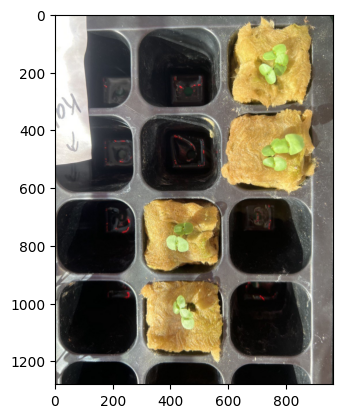

In [10]:
img, path, filename = pcv.readimage(filename=args.image)

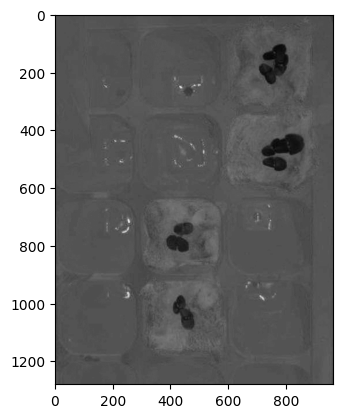

In [11]:
#   channel- Split by 'l' (lightness), 'a' (green-magenta), or 'b' (blue-yellow) channel
a = pcv.rgb2gray_lab(rgb_img=img, channel='a')


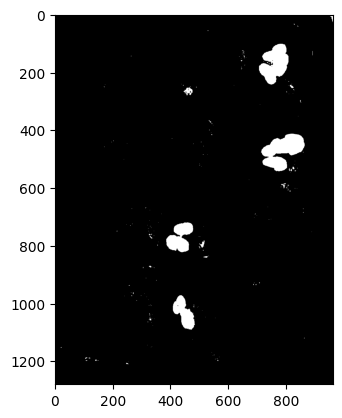

In [12]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, 
                                object_type='dark')

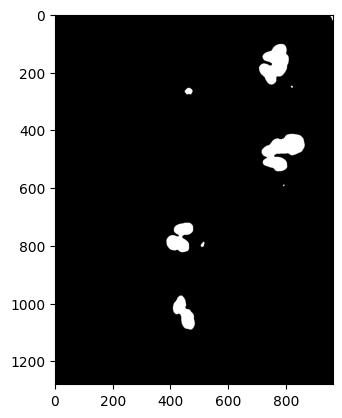

In [18]:
s_mblur = pcv.median_blur(gray_img=a_thresh, ksize=10)

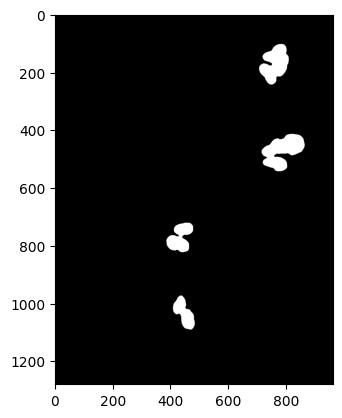

In [27]:
fill_image = pcv.fill(bin_img=s_mblur, size=1000)

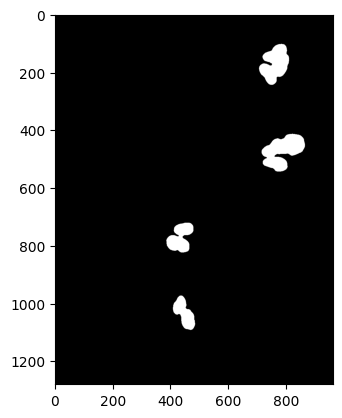

In [33]:
# https://www.cs.auckland.ac.nz/courses/compsci773s1c/lectures/ImageProcessing-html/topic4.htm
dilated = pcv.dilate(gray_img=fill_image, ksize=2, i=1)


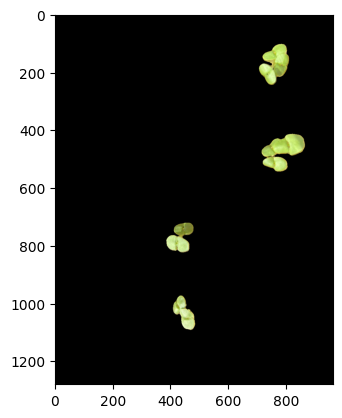

In [34]:
masked = pcv.apply_mask(img=img, mask=dilated, mask_color='black')


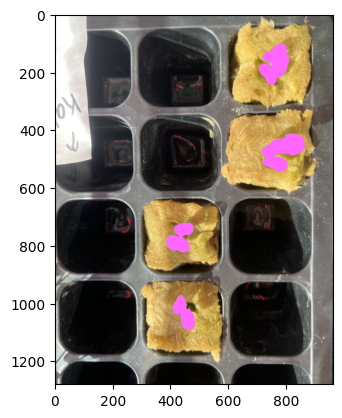

In [35]:
id_objects, obj_hierarchy = pcv.find_objects(img=img, mask=dilated)

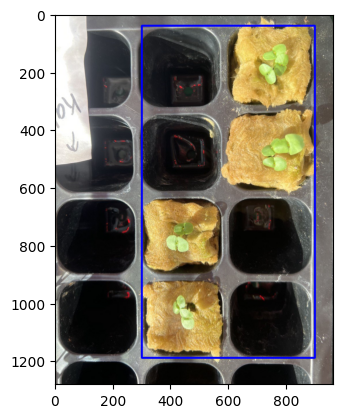

In [47]:
roi_contour, roi_hierarchy = pcv.roi.rectangle(img=img, x=300, y=40, h=1150, w=600)


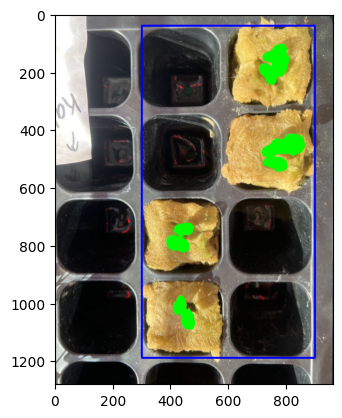

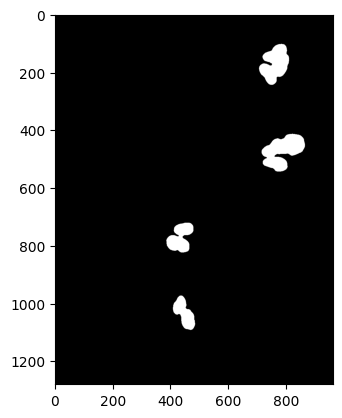

In [48]:
roi_objects, roi_obj_hierarchy, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi_contour, 
                                                                      roi_hierarchy=roi_hierarchy,
                                                                      object_contour=id_objects, 
                                                                      obj_hierarchy=obj_hierarchy, 
                                                                      roi_type='partial')

In [75]:
in_bounds = pcv.within_frame(mask=kept_mask, label="default")


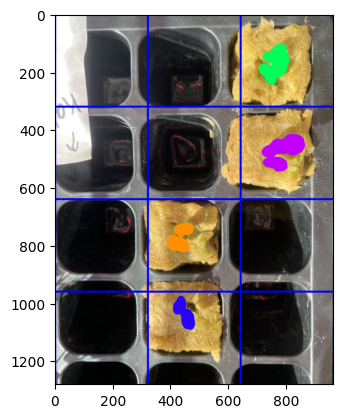

In [76]:
clusters_i, contours, hierarchies = pcv.cluster_contours(img=img, roi_objects=roi_objects, 
                                                         roi_obj_hierarchy=roi_obj_hierarchy, 
                                                         nrow=4, ncol=3, 
                                                         show_grid=True)

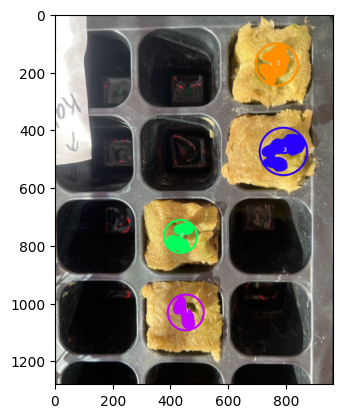

In [77]:
cluster_img = pcv.visualize.clustered_contours(img=img, grouped_contour_indices=clusters_i, 
                                                roi_objects=contours,
                                                roi_obj_hierarchy=hierarchies)

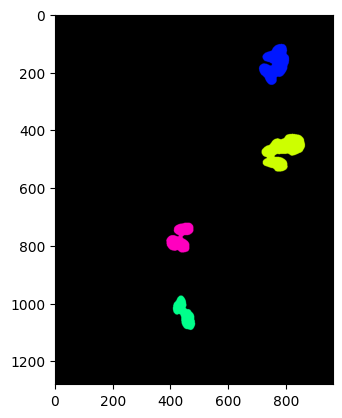

In [78]:
clust_img, clust_masks = pcv.spatial_clustering(mask=kept_mask, algorithm="DBSCAN", min_cluster_size=4, max_distance=None)


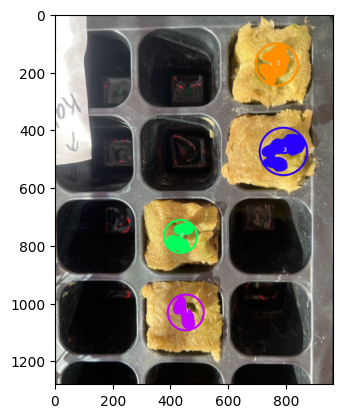

In [79]:
pcv.params.color_sequence = 'random'
cluster_img = pcv.visualize.clustered_contours(img=img, grouped_contour_indices=clusters_i, 
                                                roi_objects=contours,
                                                roi_obj_hierarchy=hierarchies)

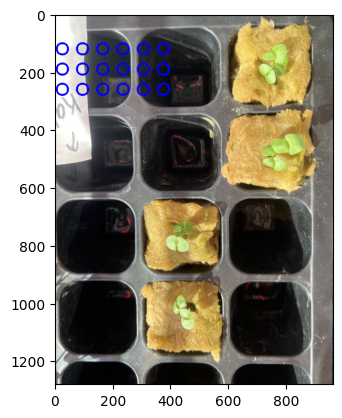

In [80]:
rois1, roi_hierarchy1 = pcv.roi.multi(img=img, coord=(25,120), radius=20, spacing=(70, 70), nrows=3, ncols=6)


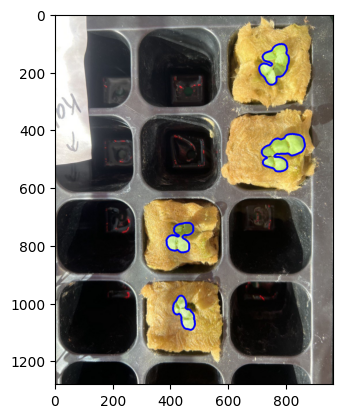

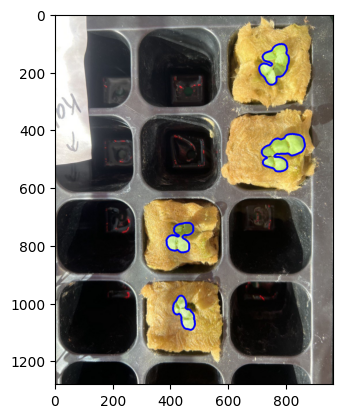

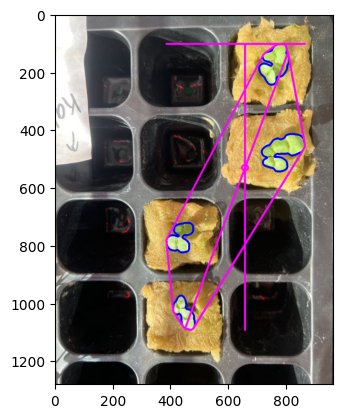

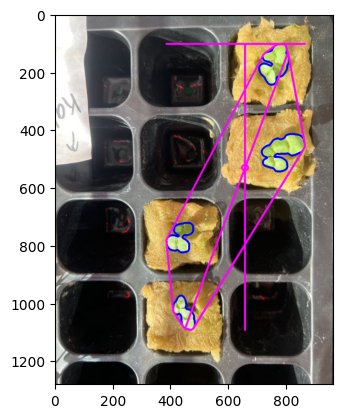

In [87]:
import numpy as np
img_copy = np.copy(img)
pcv.params.debug = args.debug

plant_contour, plant_mask = pcv.object_composition(img=img_copy, contours=contours, hierarchy=hierarchies)
img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=kept_mask, label="test")
pcv.plot_image(img_copy)

In [62]:
import numpy as np 

# Turn off debug so intermediate images are not plotted
pcv.params.debug = None

img_copy = np.copy(img)

# Analyze each plant using the ROI's created by using the grid setup for pcv.roi.multi

for i in range(0, len(contours)):
    roi = contours[i]
    hierarchy = hierarchies[i]
    # Filter objects by ROI 
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=roi_objects, 
        obj_hierarchy=roi_obj_hierarchy)

    # Combine objects together in each plant     
    plant_contour, plant_mask = pcv.object_composition(img=img_copy, contours=filtered_contours, hierarchy=filtered_hierarchy)        

    # Analyze the shape of each plant 
    img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=str(i))

# The save results function will take the measurements stored when running any PlantCV analysis functions, format, 
# and print an output text file for data analysis. The Outputs class stores data whenever any of the following functions
# are ran: analyze_bound_horizontal, analyze_bound_vertical, analyze_color, analyze_nir_intensity, analyze_object, 
# fluor_fvfm, report_size_marker_area, watershed. If no functions have been run, it will print an empty text file 
pcv.outputs.save_results(filename=args.result)

# Plot out the image with shape analysis on each plant in the image 
pcv.plot_image(img_copy)

error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/drawing.cpp:2516: error: (-215:Assertion failed) hierarchy.total() == ncontours && hierarchy.type() == CV_32SC4 in function 'drawContours'
